<a href="https://colab.research.google.com/github/MonkeyWrenchGang/2024_BAN7040/blob/main/2_1_EDA_101_%26_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)
---

## Introduction

This notebook takes a look at Exploratory Data Analysis (EDA) using the Adult dataset from the UCI Machine Learning Repository. This dataset contains demographic information about individuals, including features such as age, education, occupation, marital status, and income level. The task associated with this dataset is to predict whether an individual earns more than $50,000 per year, based on their demographic attributes.

In this notebook, we'll explore of the Adult dataset, employing various techniques and visualizations to gain insights into the data's characteristics, identify patterns, and understand the relationships between different variables. We will also craft a simple huristic to predict income and see how it compares to the default prediction.

## Dataset Overview

The Adult dataset contains the following columns:

- **age**: Age of the individual.
- **workclass**: Type of workclass (e.g., Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked).
- **education**: Highest level of education completed by the individual.
- **education-num**: Numeric representation of education level.
- **marital-status**: Marital status of the individual.
- **occupation**: Occupation of the individual.
- **relationship**: Relationship status of the individual.
- **race**: Race of the individual.
- **sex**: Gender of the individual.
- **capital-gain**: Capital gains of the individual.
- **capital-loss**: Capital losses of the individual.
- **hours-per-week**: Number of hours worked per week.
- **native-country**: Country of origin of the individual.
- **income**: Income level of the individual (<=50K or >50K).

## Objectives

- Load and preprocess the dataset for analysis.
- Explore the distribution and relationships between different features.
- Identify potential predictors for income level (>50K or <=50K).
- Evaluate the predictive power of selected features.
- Gain insights that inform further analysis and modeling decisions.

Let's get started with our EDA!


## Part 1. Simple EDA

### 1. Stage Data

### 2. Clean Up Column Names

### 3. Describe Data

### 4. Explore Likely Predictors

## Part 2. rule based Decision Making

### 5. Partition Into 75/25 Split

### 6. Write a Rule to Predict Likely Targets

### 7. Evaluate Your Rule


### Load Packages
-------



In [1]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -- first sklearn module, split training and test
from sklearn.model_selection import train_test_split

# -- need this to render charts in notebook --
%matplotlib inline

# Part 1.
## 1. Stage
-----
import our dataset into a pandas dataframe


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/HandsOnDataScience_Python/master/Week_1/data/adult.csv", na_values="?")
df = df.drop('Unnamed: 0', axis=1)
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,Female,0,0,30,United-States,<=50K


## 2.  Clean up Column Names

*It's just not fun dealing with ill-formed columns*

- remove leading and trailing characters
- replace spaces with underscores _
- change case to lower case
- remove various special characters

In [3]:
df.columns = ( df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('-', '_')
    .str.replace('(', '')
    .str.replace(')', '')
    .str.replace('?', '')
    .str.replace('\'', '') # notice the backslash \ this is an escape character
)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

## 3. Describe data
### Check Target
-----
always start by understanding your target value


In [4]:
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

In [5]:
df['income'].value_counts(normalize=True)

income
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64

<Axes: xlabel='income'>

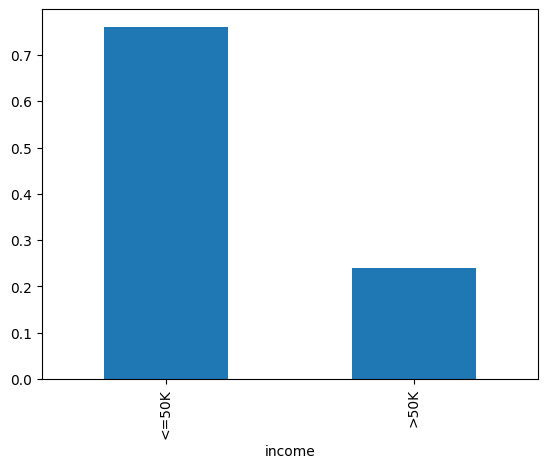

In [6]:
df['income'].value_counts(normalize=True).plot(kind="bar")

In [7]:
df['educational_num'].value_counts(normalize=True)

educational_num
9     0.323164
10    0.222718
13    0.164305
14    0.054400
11    0.042197
7     0.037099
12    0.032779
6     0.028439
4     0.019553
15    0.017075
5     0.015478
8     0.013452
16    0.012162
3     0.010421
2     0.005057
1     0.001699
Name: proportion, dtype: float64

### Describe
---------
Always take a look at your data to see what you are dealing with

In [37]:
df.groupby('income').describe().round(2).T

income                      <=50K        >50K
age             count    37155.00    11687.00
                mean        36.87       44.28
                std         14.10       10.56
                min         17.00       19.00
                25%         25.00       36.00
                50%         34.00       43.00
                75%         46.00       51.00
                max         90.00       90.00
fnlwgt          count    37155.00    11687.00
                mean    190039.57   188470.57
                std     106577.60   102442.73
                min      12285.00    13769.00
                25%     117210.00   118942.50
                50%     178811.00   176729.00
                75%     238917.00   233505.00
                max    1490400.00  1226583.00
educational_num count    37155.00    11687.00
                mean         9.60       11.60
                std          2.44        2.38
                min          1.00        1.00
                25%          9.00       10.00
                50%          9.00       12.00
                75%         10.00       13.00
                max         16.00       16.00
capital_gain    count    37155.00    11687.00
                mean       147.01     4042.24
                std        936.75    14756.77
                min          0.00        0.00
                25%          0.00        0.00
                50%          0.00        0.00
                75%          0.00        0.00
                max      41310.00    99999.00
capital_loss    count    37155.00    11687.00
                mean        54.15      193.53
                std        313.32      593.21
                min          0.00        0.00
                25%          0.00        0.00
                50%          0.00        0.00
                75%          0.00        0.00
                max       4356.00     3683.00
hours_per_week  count    37155.00    11687.00
                mean        38.84       45.45
                std         12.36       11.09
                min          1.00        1.00
                25%         35.00       40.00
                50%         40.00       40.00
                75%         40.00       50.00
                max         99.00       99.00

<Axes: xlabel='age', ylabel='Count'>

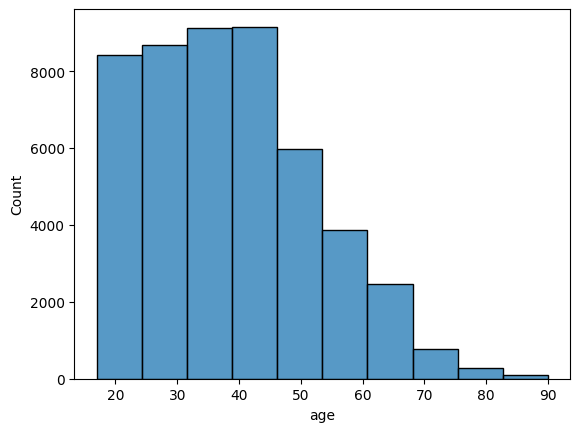

In [32]:
sns.histplot(data=df,x='age',bins=10)

#### Check out Nulls
----
Null values can be interesting but you have to deal with them when we get to building models. step 1 is to identify your problem areas. step 2 would be to figure out if there is any predictive power in the nulls, step 3. would be handle them. forturnately we are just going to deal with identifyin if we have any nulls.

In [10]:
# -- count nulls by column --
df.isnull().sum(axis = 0)

age                   0
workclass          2799
fnlwgt                0
education             0
educational_num       0
marital_status        0
occupation         2809
relationship          0
gender                0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      857
income                0
dtype: int64

## 4. Explore likely predictors
### Make Histograms, Crosstabs and Barcharts


-----

We are looking to identify variables, split points and conditions that are likely useful to predict our target.

Here is my basic recipe.
1. Use histograms on NUMERIC varaibles, mess with the number of bins to make a more interesting chart.
2. Use crosstab to create a table of frequencies for CATEGORICAL variables, you may want to normalize or not, i do both.
    - first create a cross tab column by target, use reset_index() to return a dataframe instead of a crosstab
    - second plot using a BAR chart(s) i typically usae one for each target variable
    - if you want to get fancy you can use the bottom option for one of your
histograms work on numbers,
barcharts are useful for categorical frequencies


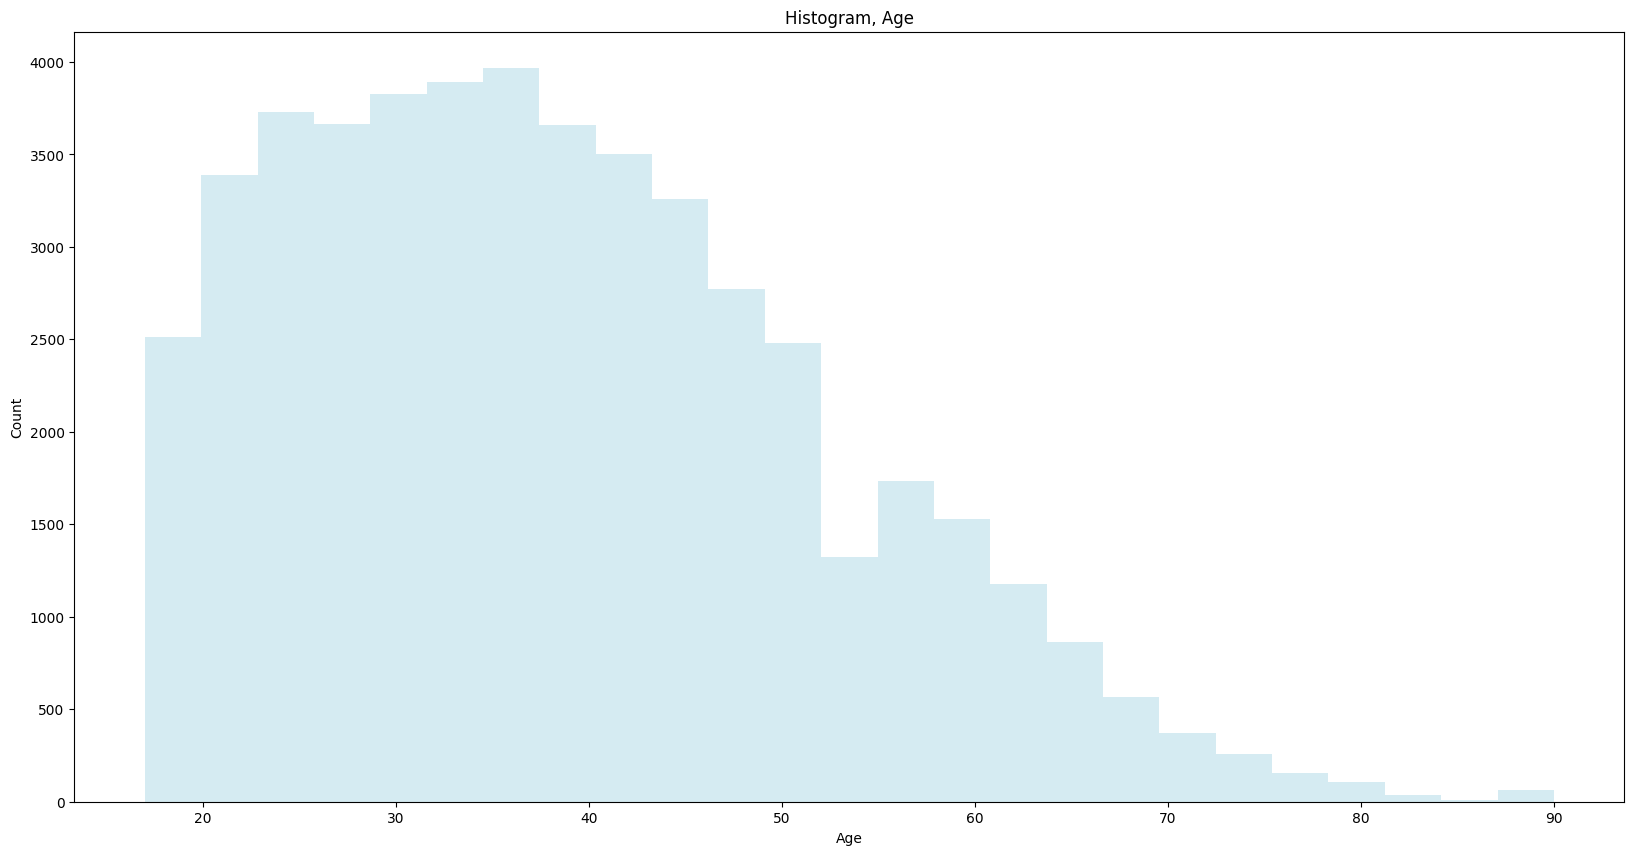

In [33]:
plt.figure(figsize=(20,10))
# -- simply change the bin size to make the chart look better --

plt.hist(df['age'], 25, facecolor='lightblue', alpha=0.5)
plt.title('Histogram, Age')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

In [12]:
# -- divide my data into two datasets by target variable
lt50 = df.loc[df['income']== "<=50K"]
gt50 = df.loc[df['income']== ">50K"]
gt50

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,gender,capital_gain,capital_loss,hours_per_week,native_country,income
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States,>50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Male,3103,0,32,United-States,>50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,6418,0,40,United-States,>50K
14,48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,3103,0,48,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48820,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,Male,0,0,10,United-States,>50K
48826,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,Female,0,0,20,United-States,>50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,40,United-States,>50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K


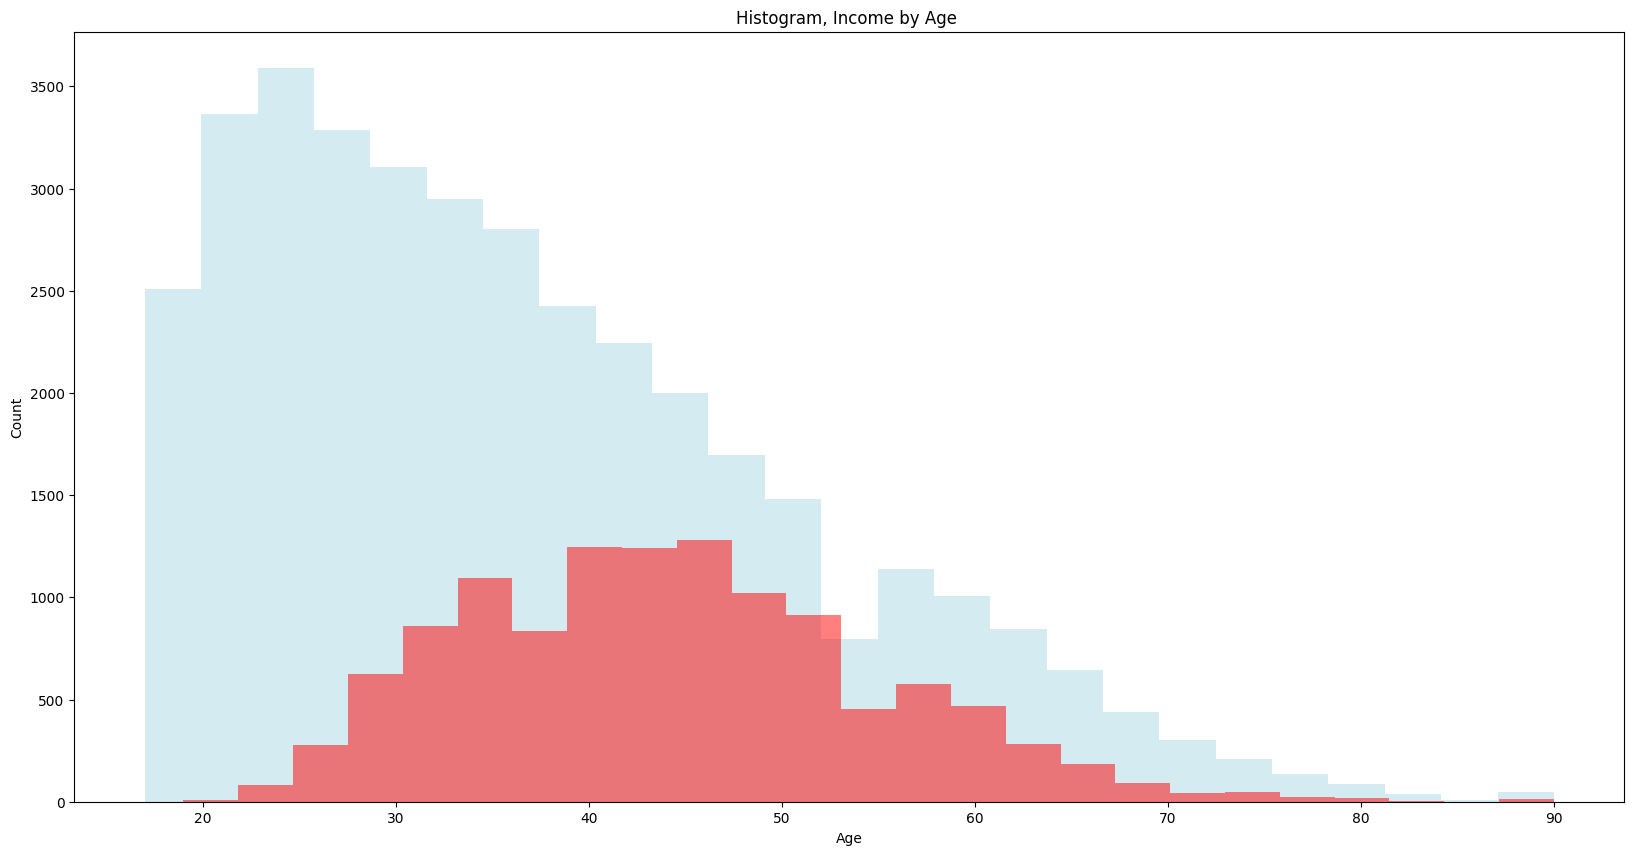

In [13]:
plt.figure(figsize=(20,10))

# -- divide my data into two datasets by target variable
lt50 = df.loc[df['income']== "<=50K"]
gt50 = df.loc[df['income']== ">50K"]

# -- simply change the bin size to make the chart look better --
plt.hist(lt50['age'], 25, facecolor='lightblue', alpha=0.5)
plt.hist(gt50['age'], 25, facecolor='red', alpha=0.5)

plt.title('Histogram, Income by Age ')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

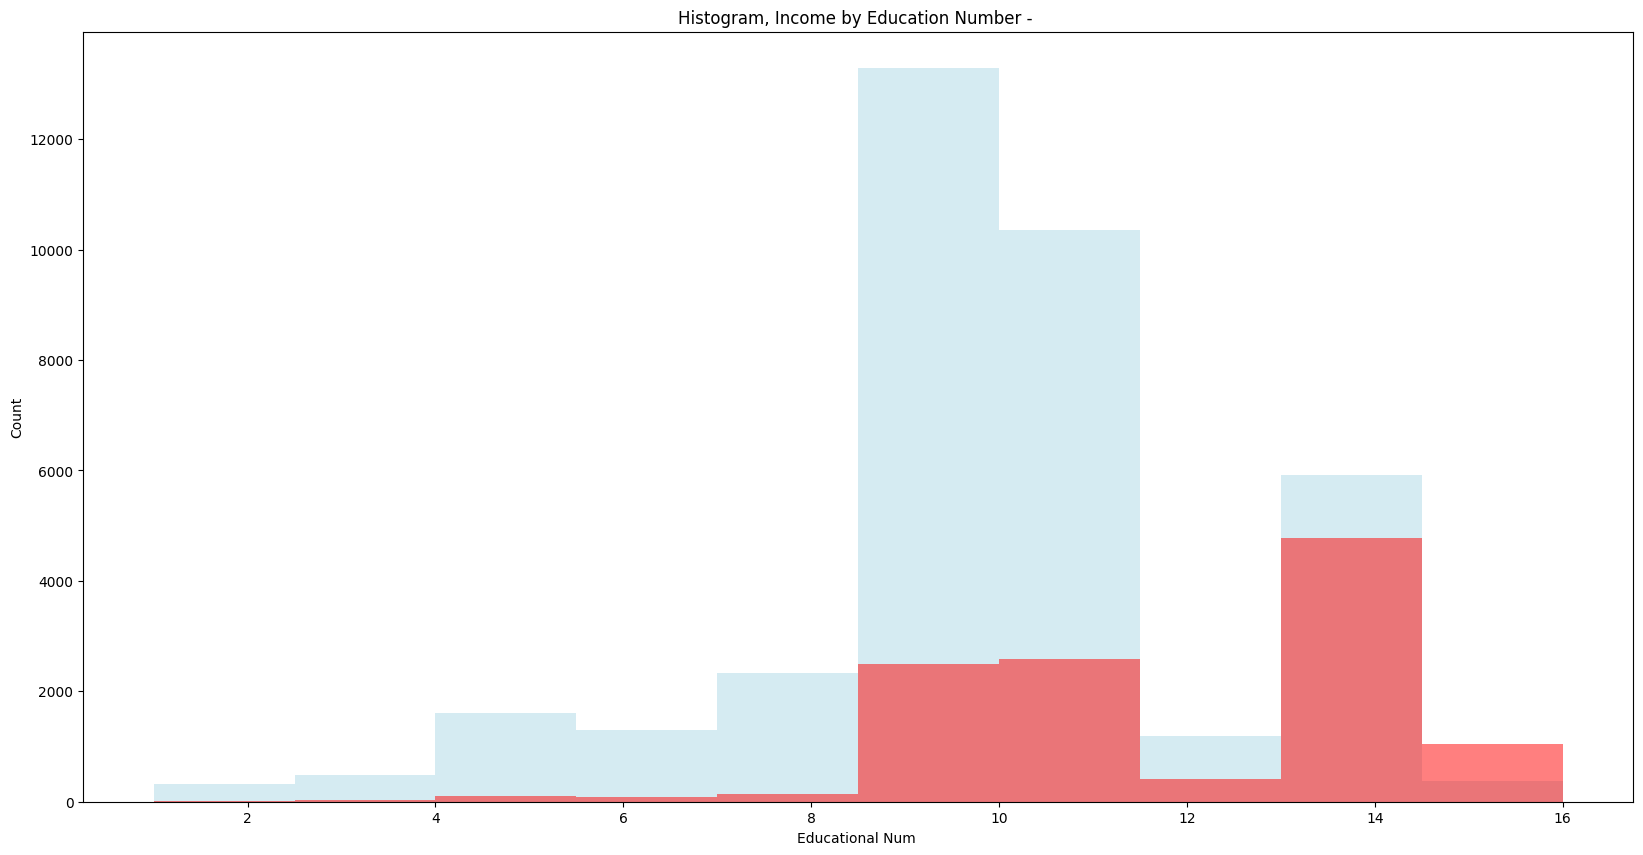

In [14]:
plt.figure(figsize=(20,10))

# -- simply change the bin size to make the chart look better --
plt.hist(lt50['educational_num'], 10, facecolor='lightblue', alpha=0.5)
plt.hist(gt50['educational_num'], 10, facecolor='red', alpha=0.5)
plt.title('Histogram, Income by Education Number - ')
plt.ylabel('Count')
plt.xlabel('Educational Num ')
plt.show()

### OK what about Categorical Data?

-----

first i use a crosstab to create a new table of the column by the target. you can read about crosstabs here

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

Can you understand the difference when we look at percentages rather than counts? what does this tell us about identifying high earners?

In [39]:
df['relationship'].value_counts().to_frame()

,count
relationship,
Husband,19716
Not-in-family,12583
Own-child,7581
Unmarried,5125
Wife,2331
Other-relative,1506


<Axes: xlabel='relationship'>

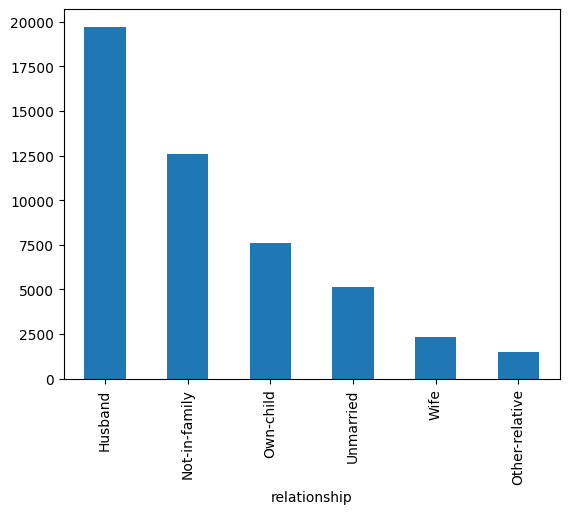

In [41]:
df['relationship'].value_counts().plot(kind="bar")

In [15]:
pd.crosstab(df['relationship'], df['income'],  normalize="index").reset_index()

income,relationship,<=50K,>50K
0,Husband,0.551329,0.448671
1,Not-in-family,0.898593,0.101407
2,Other-relative,0.965471,0.034529
3,Own-child,0.985358,0.014642
4,Unmarried,0.939707,0.060293
5,Wife,0.531103,0.468897


In [43]:
# -- normalize index converts to row percetages
ctab = pd.crosstab(df['relationship'], df['income'], normalize="index").reset_index()
ctab

income,relationship,<=50K,>50K
0,Husband,0.551329,0.448671
1,Not-in-family,0.898593,0.101407
2,Other-relative,0.965471,0.034529
3,Own-child,0.985358,0.014642
4,Unmarried,0.939707,0.060293
5,Wife,0.531103,0.468897


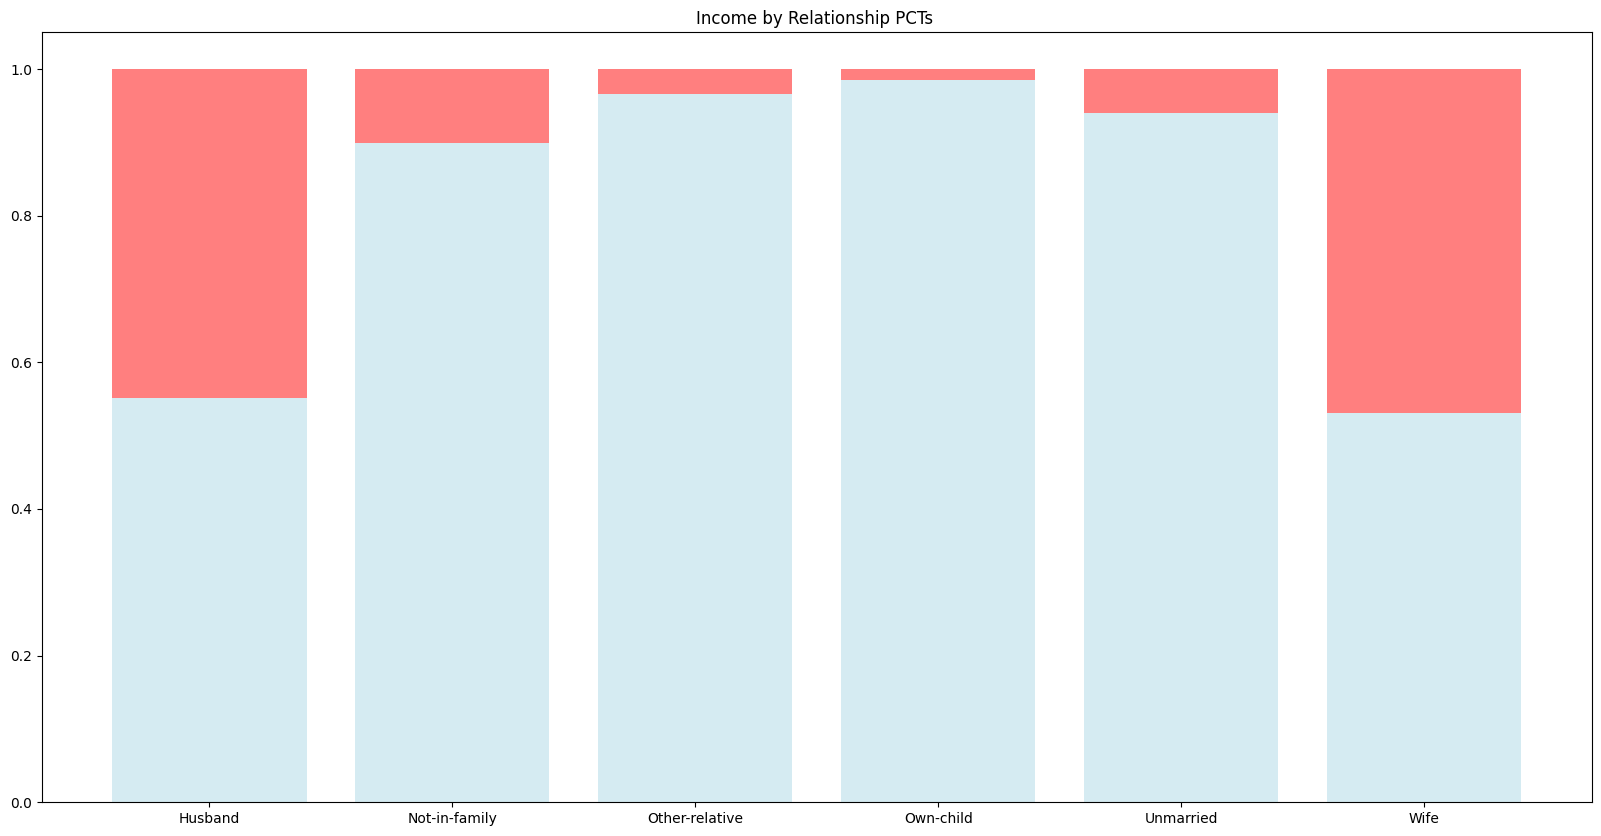

In [44]:
plt.figure(figsize=(20,10))
# -- check out bottom
plt.bar(ctab['relationship'], ctab['<=50K'], facecolor='lightblue', alpha=0.5)
plt.bar(ctab['relationship'], ctab['>50K'], bottom=ctab['<=50K'], facecolor='red', alpha=0.5)
plt.title('Income by Relationship PCTs ')
plt.show()

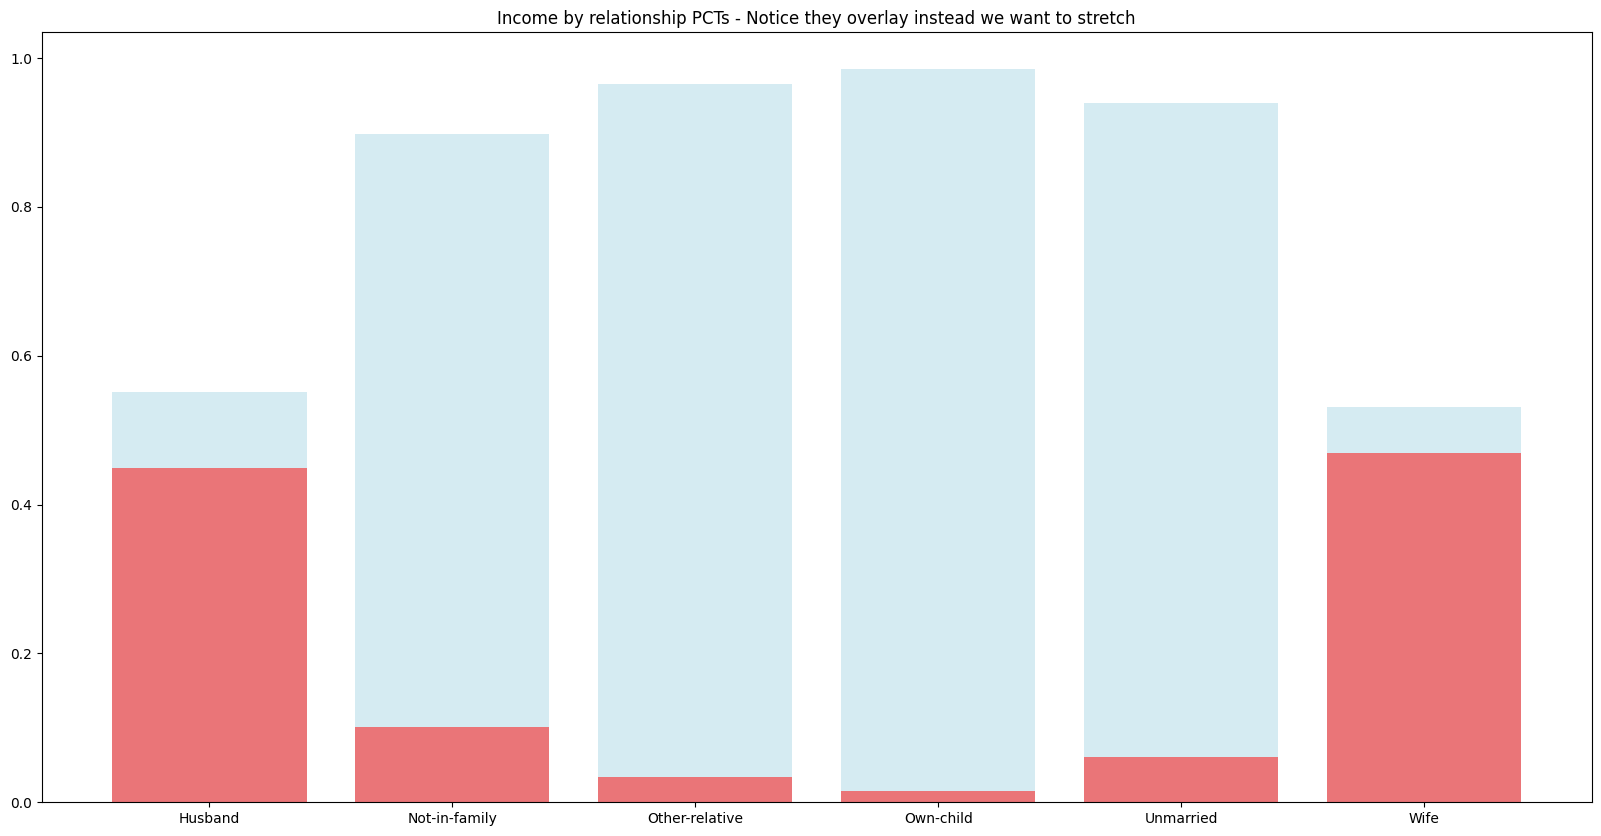

In [17]:
plt.figure(figsize=(20,10))
# --
plt.bar(ctab['relationship'], ctab['<=50K'], facecolor='lightblue', alpha=0.5)
plt.bar(ctab['relationship'], ctab['>50K'], facecolor='red', alpha=0.5)
plt.title('Income by relationship PCTs - Notice they overlay instead we want to stretch')
plt.show()

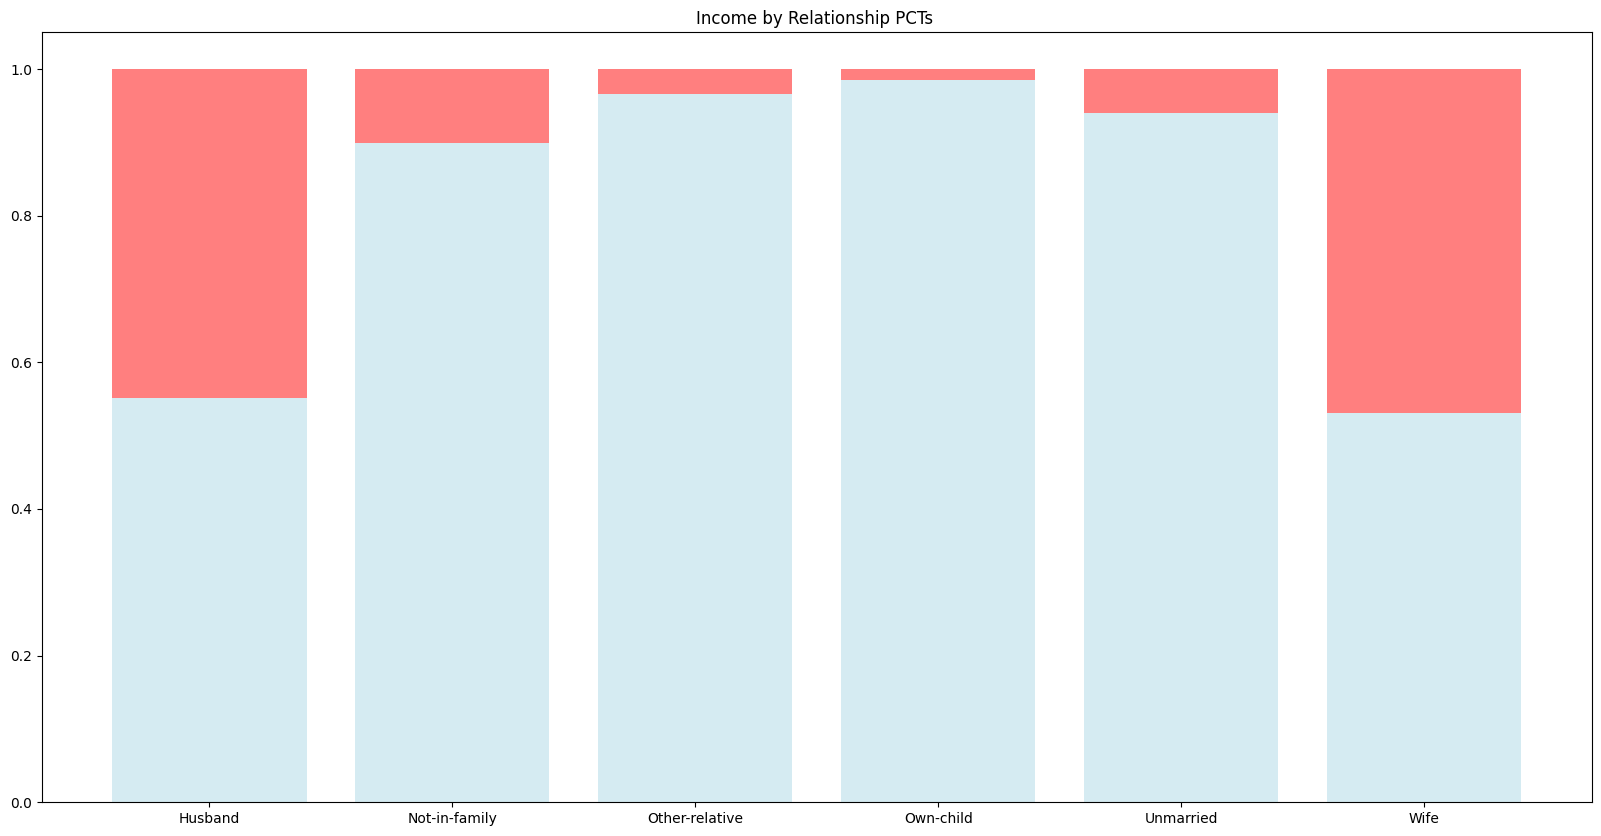

In [18]:
plt.figure(figsize=(20,10))
# -- check out bottom
plt.bar(ctab['relationship'], ctab['<=50K'], facecolor='lightblue', alpha=0.5)
plt.bar(ctab['relationship'], ctab['>50K'], bottom=ctab['<=50K'], facecolor='red', alpha=0.5)
plt.title('Income by Relationship PCTs ')
plt.show()

In [19]:
# -- without normalization you just get a frequency about the categories, which is usefull too.
ctab = pd.crosstab(df['relationship'], df['income']).reset_index()
ctab

income,relationship,<=50K,>50K
0,Husband,10870,8846
1,Not-in-family,11307,1276
2,Other-relative,1454,52
3,Own-child,7470,111
4,Unmarried,4816,309
5,Wife,1238,1093


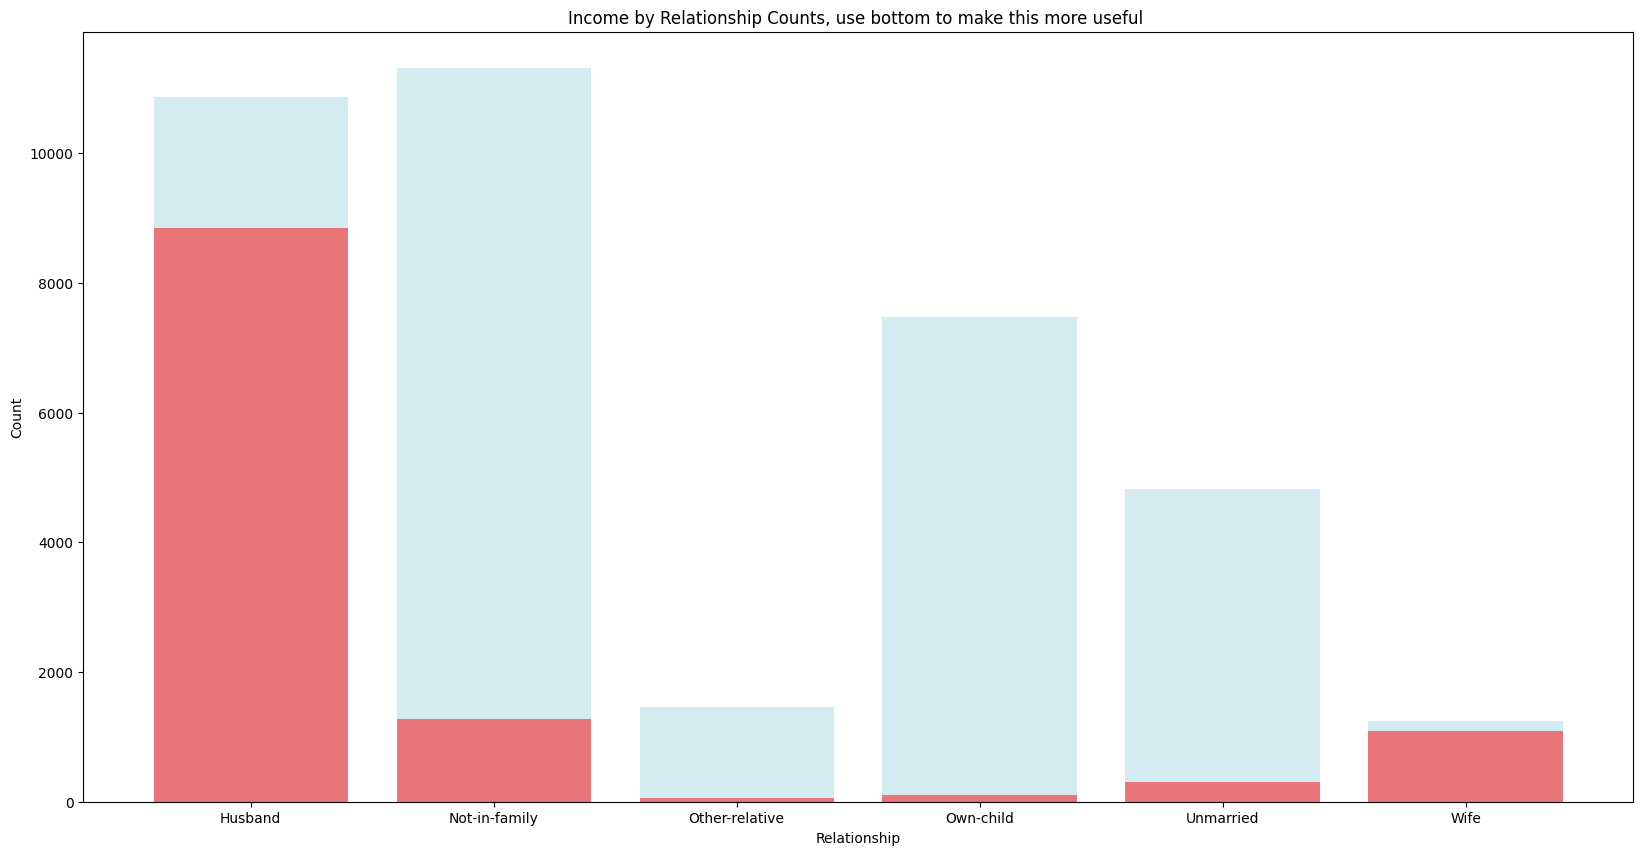

In [20]:
plt.figure(figsize=(20,10))
plt.bar(ctab['relationship'],ctab['<=50K'], facecolor='lightblue', alpha=0.5)
plt.bar(ctab['relationship'],ctab['>50K'], facecolor='red', alpha=0.5)
plt.title('Income by Relationship Counts, use bottom to make this more useful ')
plt.ylabel('Count')
plt.xlabel('Relationship')
plt.show()

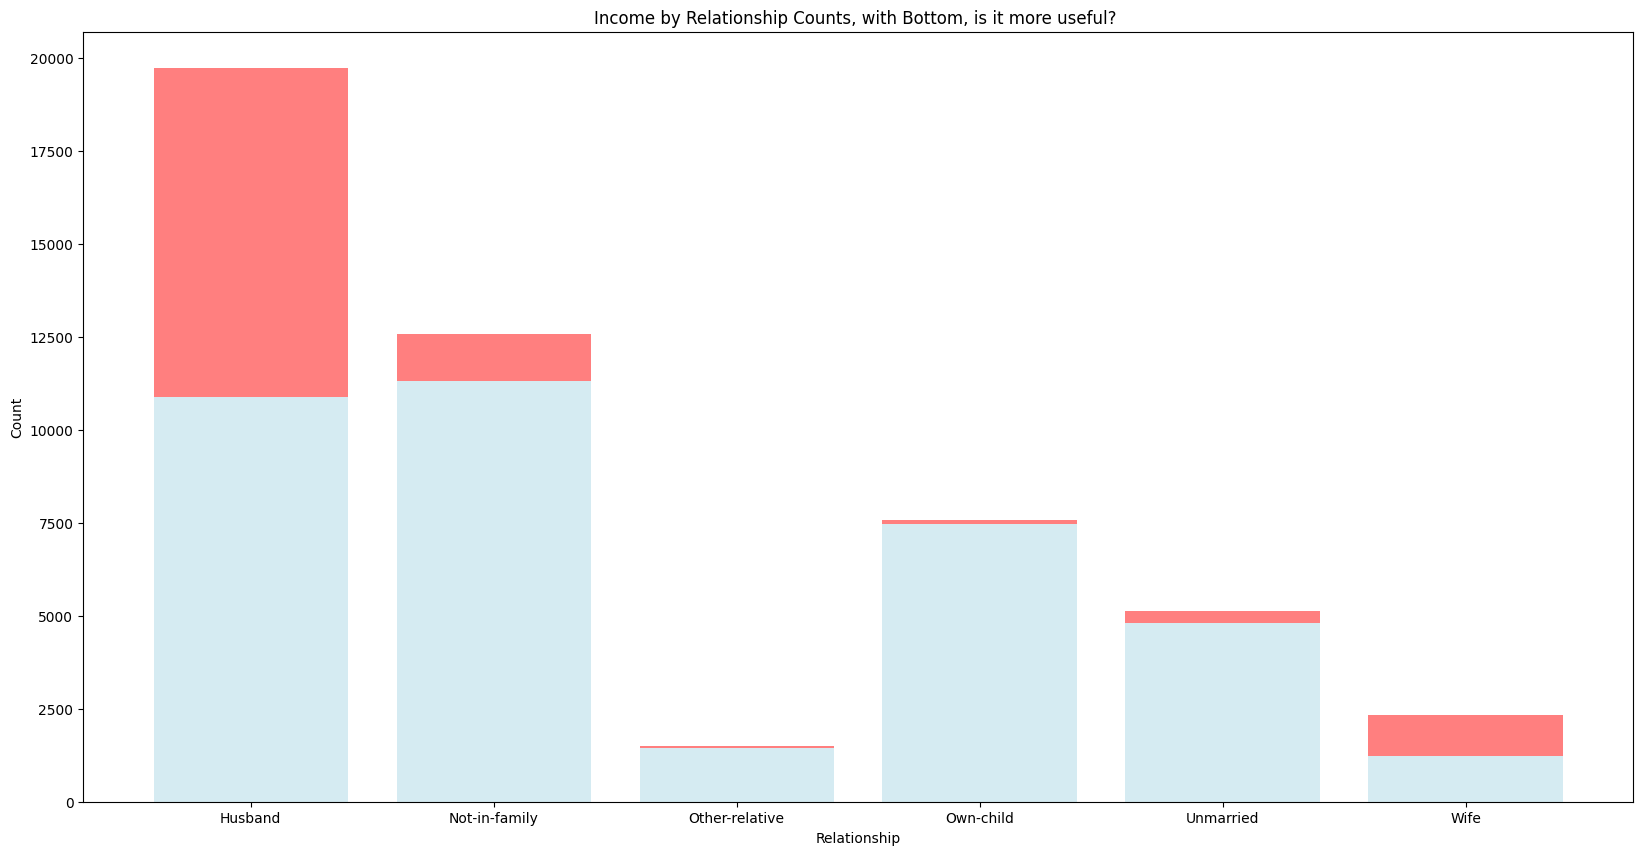

In [21]:
plt.figure(figsize=(20,10))
plt.bar(ctab['relationship'],ctab['<=50K'], facecolor='lightblue', alpha=0.5)
plt.bar(ctab['relationship'],ctab['>50K'], bottom=ctab['<=50K'], facecolor='red', alpha=0.5)
plt.title('Income by Relationship Counts, with Bottom, is it more useful? ')
plt.ylabel('Count')
plt.xlabel('Relationship')
plt.show()

In [22]:
# -- normalize index converts to row percetages, sort ascending=False means it will sort largest to smallest
ctab = pd.crosstab(df['education'], df['income'], normalize="index").reset_index().sort_values('<=50K',ascending=False )
ctab

income,education,<=50K,>50K
13,Preschool,0.987952,0.012048
3,1st-4th,0.967611,0.032389
1,11th,0.949227,0.050773
4,5th-6th,0.946955,0.053045
6,9th,0.945767,0.054233
0,10th,0.937365,0.062635
5,7th-8th,0.935079,0.064921
2,12th,0.926941,0.073059
11,HS-grad,0.841422,0.158578
15,Some-college,0.810351,0.189649


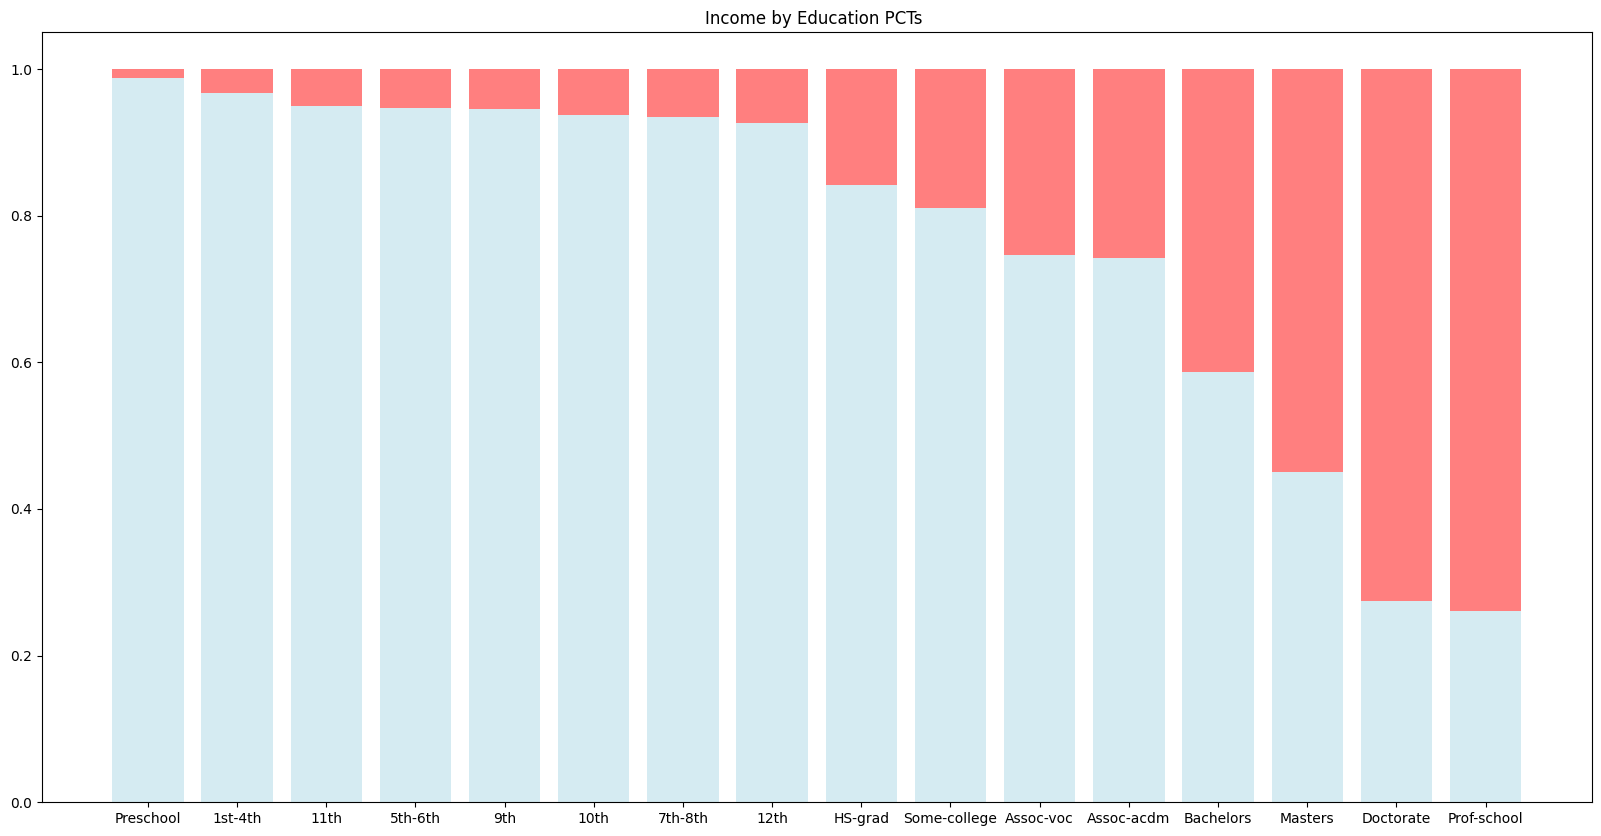

In [23]:
plt.figure(figsize=(20,10))
# -- check out bottom
plt.bar(ctab['education'], ctab['<=50K'], facecolor='lightblue', alpha=0.5)
plt.bar(ctab['education'], ctab['>50K'], bottom=ctab['<=50K'], facecolor='red', alpha=0.5)
plt.title('Income by Education PCTs ')
plt.show()

age


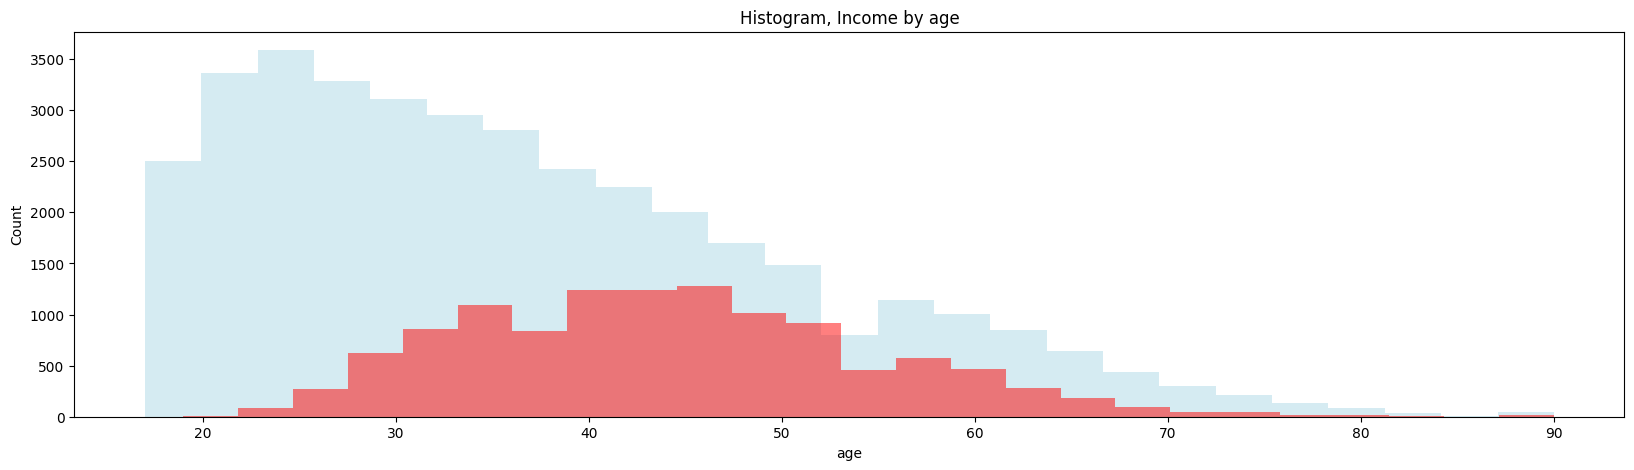

fnlwgt


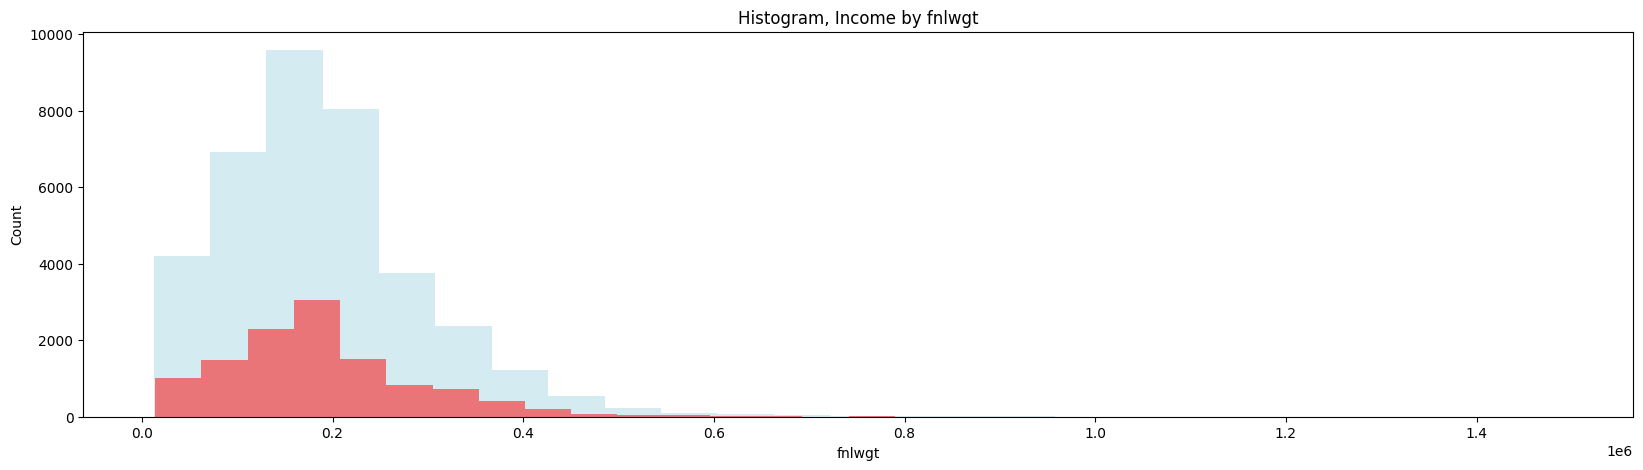

educational_num


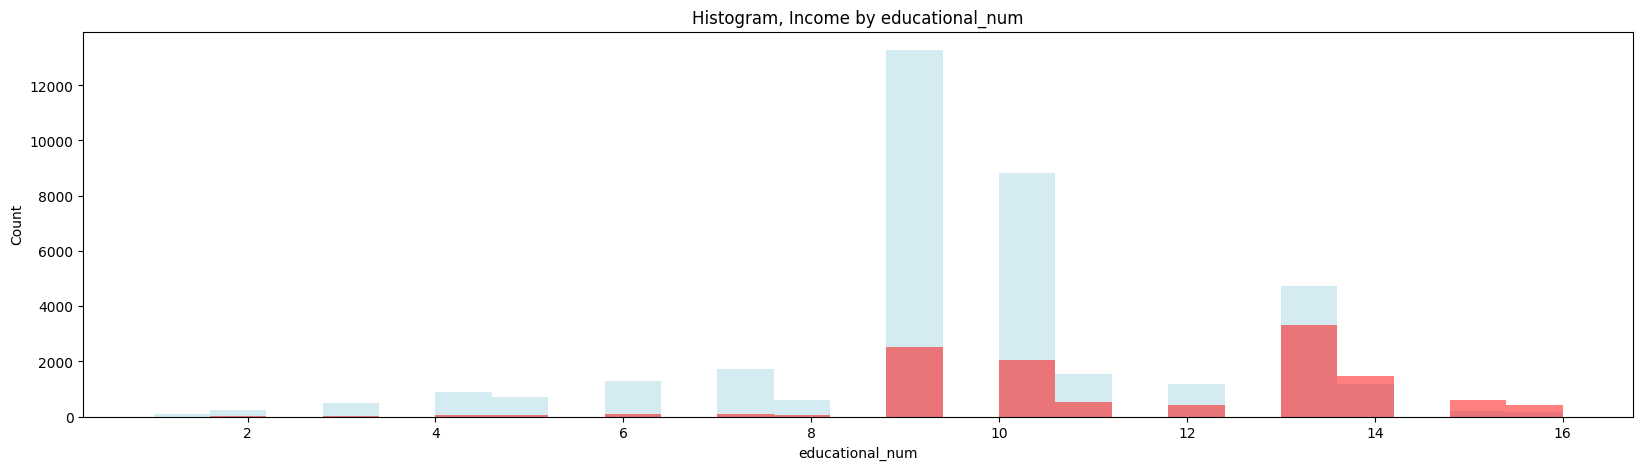

capital_gain


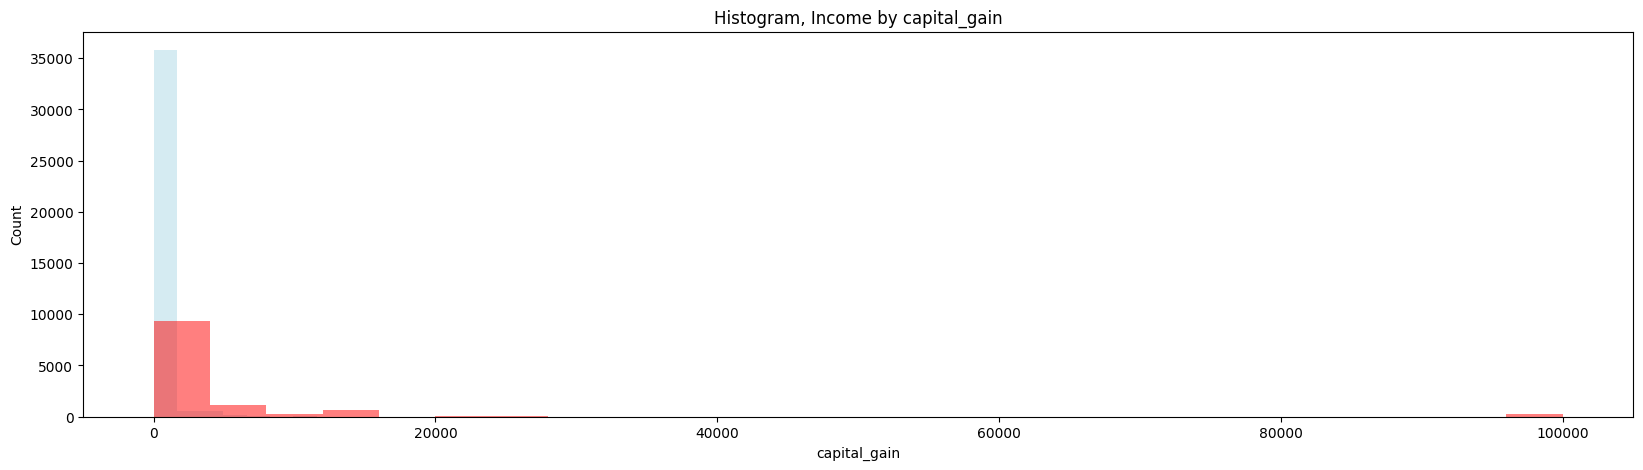

capital_loss


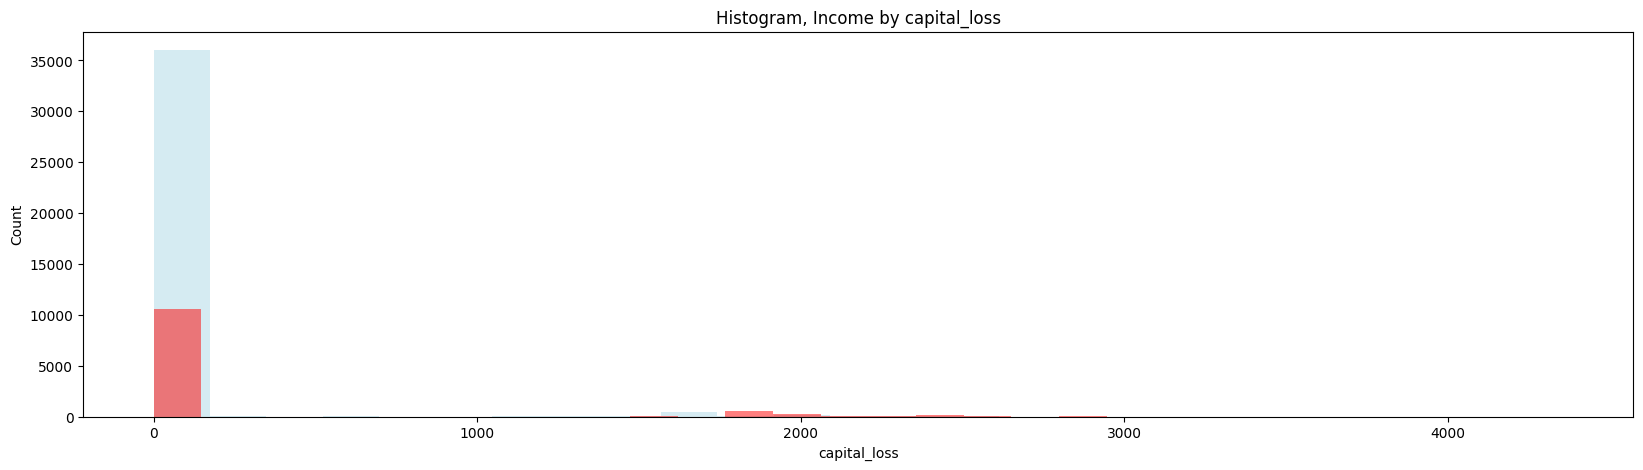

hours_per_week


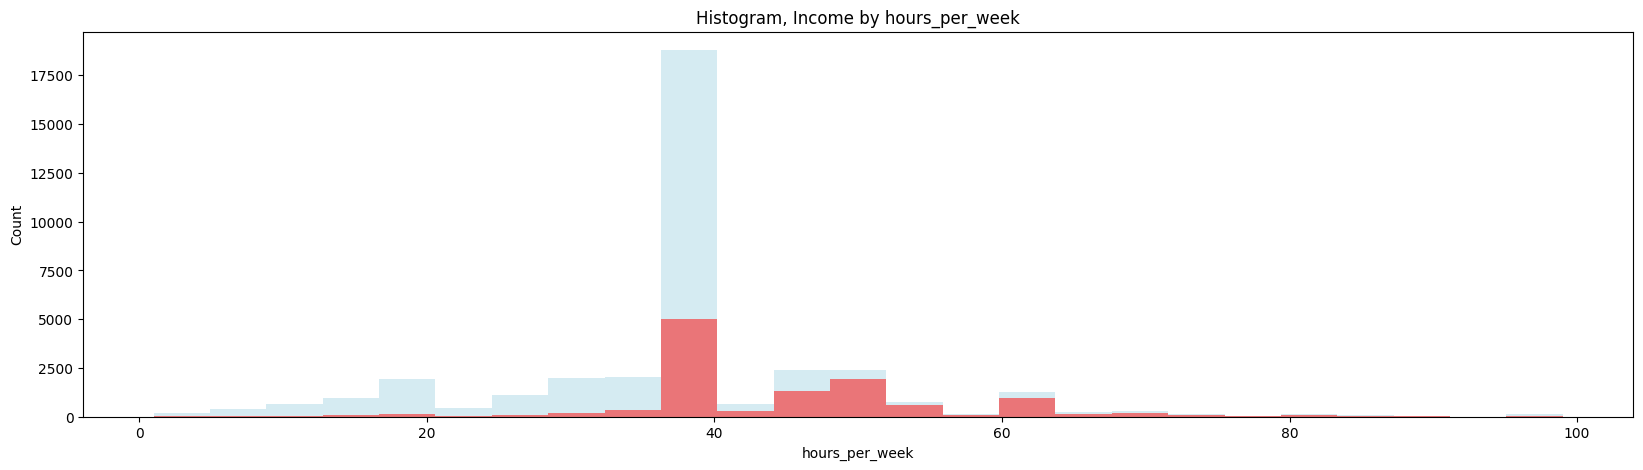

In [24]:

def hist_nums(col):
    plt.figure(figsize=(20,5))
    # -- divide my data into two datasets by target variable
    lt50 = df.loc[df['income']== "<=50K"]
    gt50 = df.loc[df['income']== ">50K"]

    # -- simply change the bin size to make the chart look better --
    plt.hist(lt50[col], 25, facecolor='lightblue', alpha=0.5)
    plt.hist(gt50[col], 25, facecolor='red', alpha=0.5)
    plt.title('Histogram, Income by ' + col)
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.show()

for num_col in df.select_dtypes(include=['float64', 'int64']).columns:
    print(num_col)
    hist_nums(num_col)


workclass


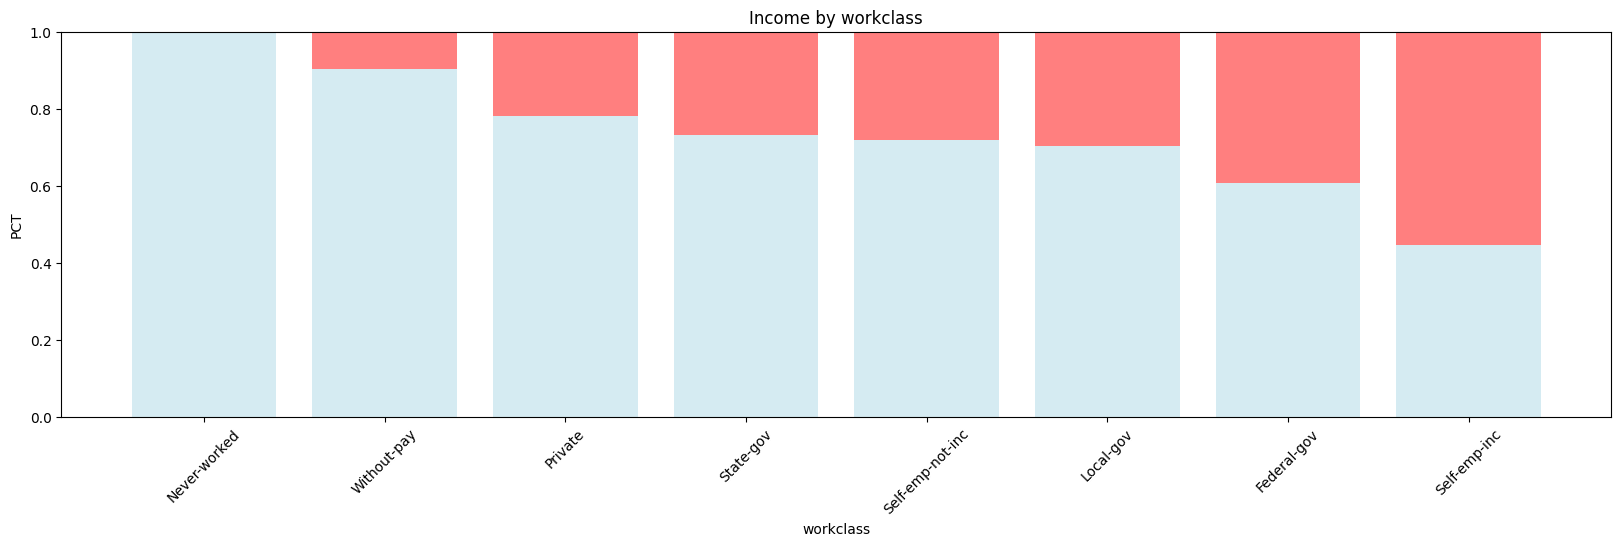

education


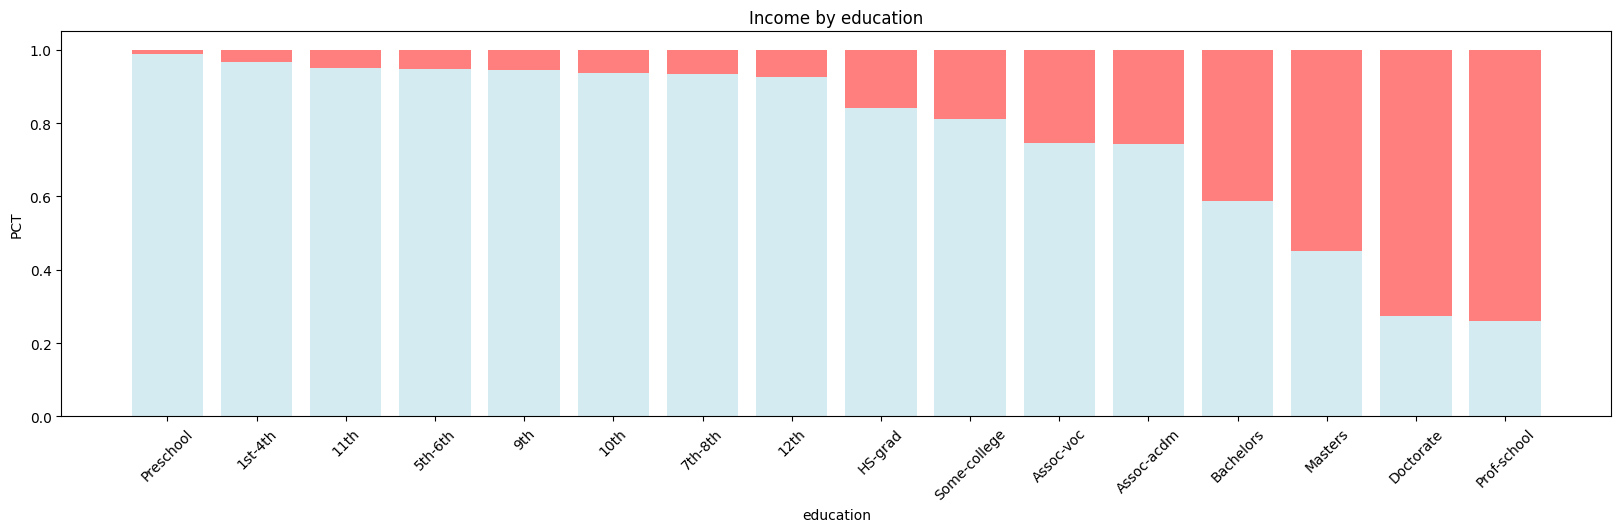

marital_status


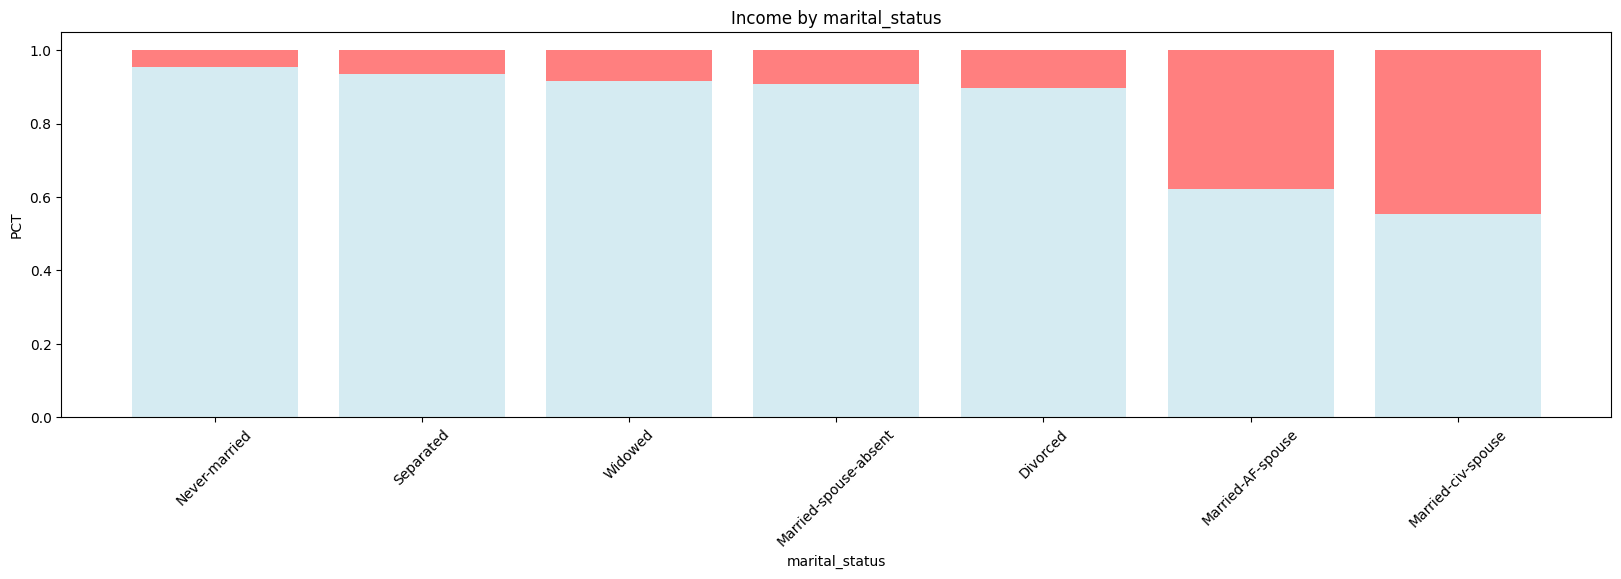

occupation


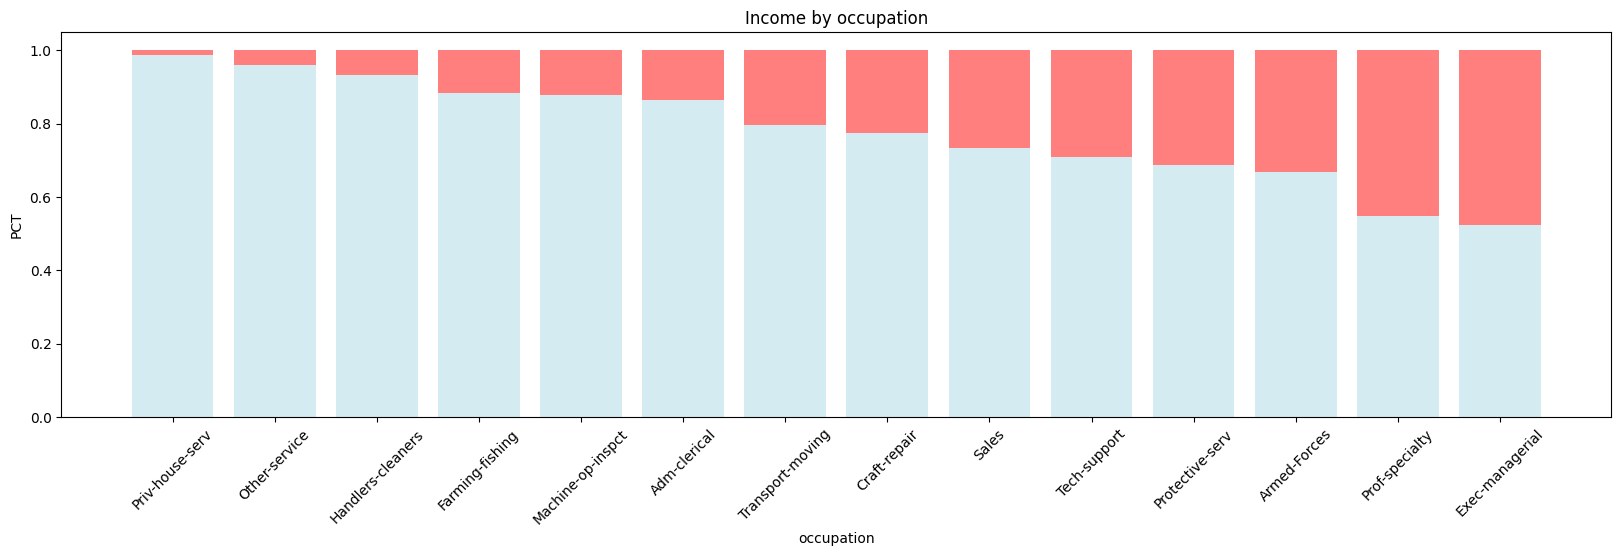

relationship


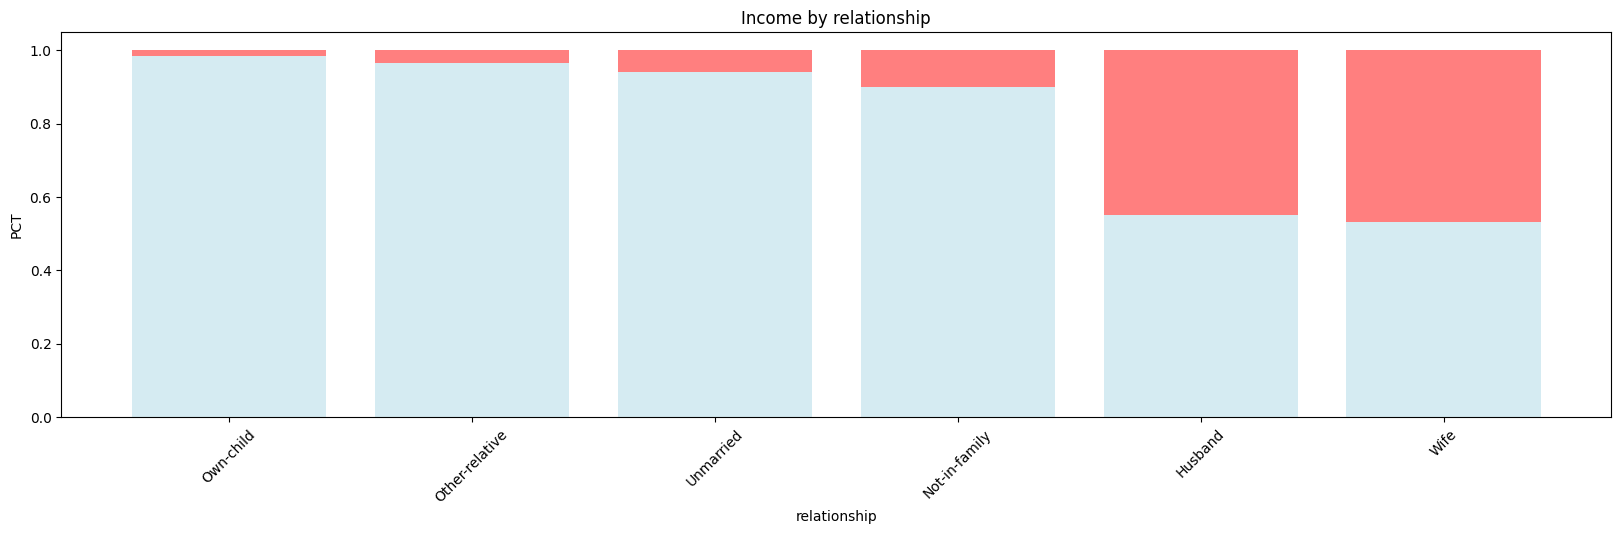

gender


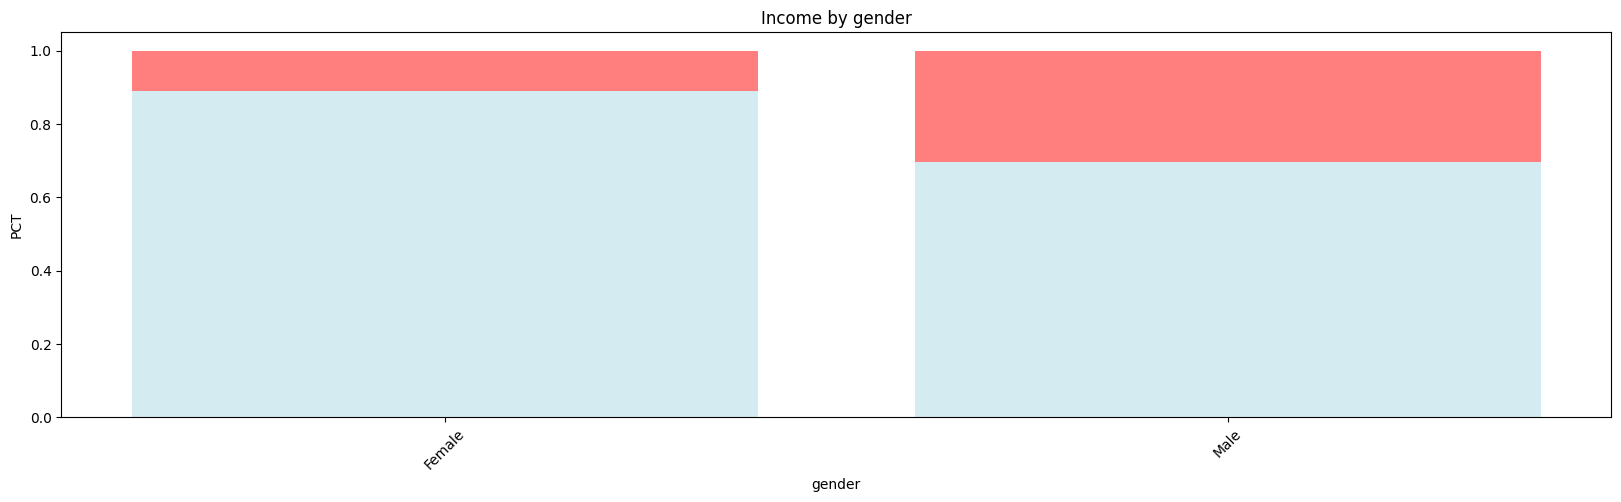

native_country


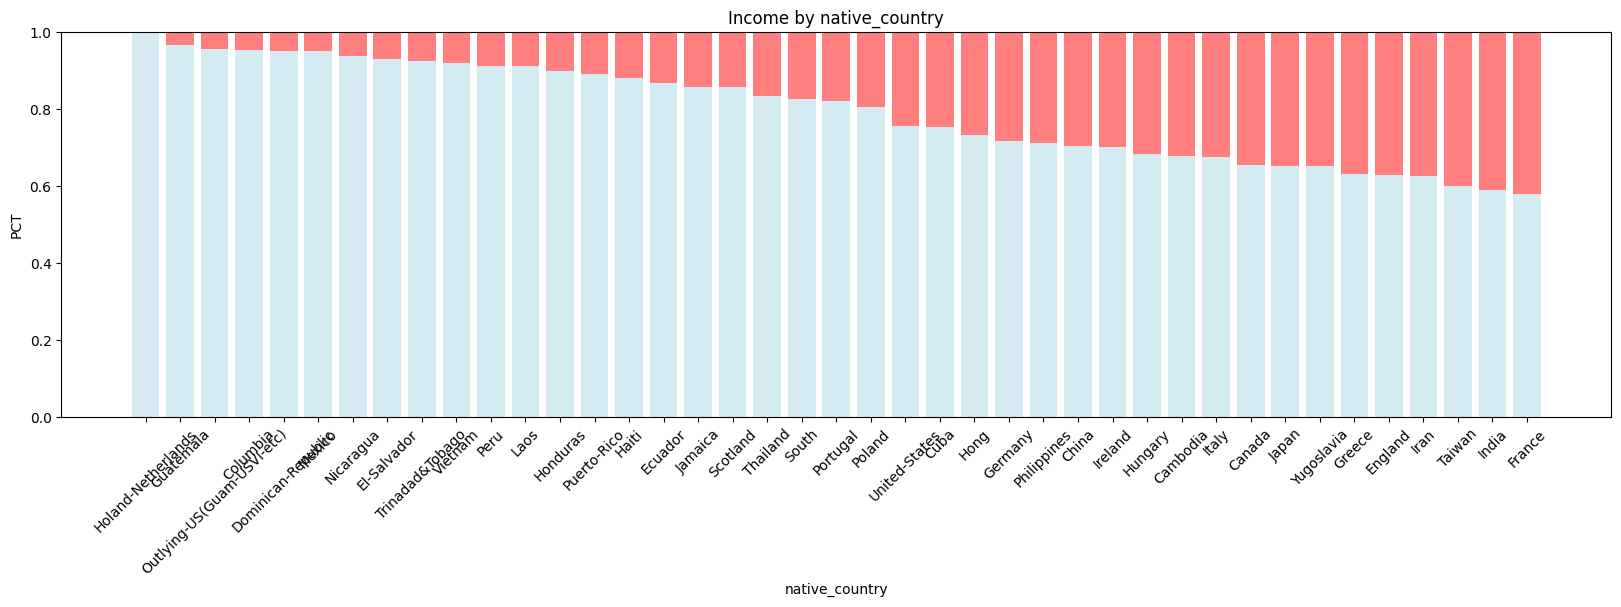

income


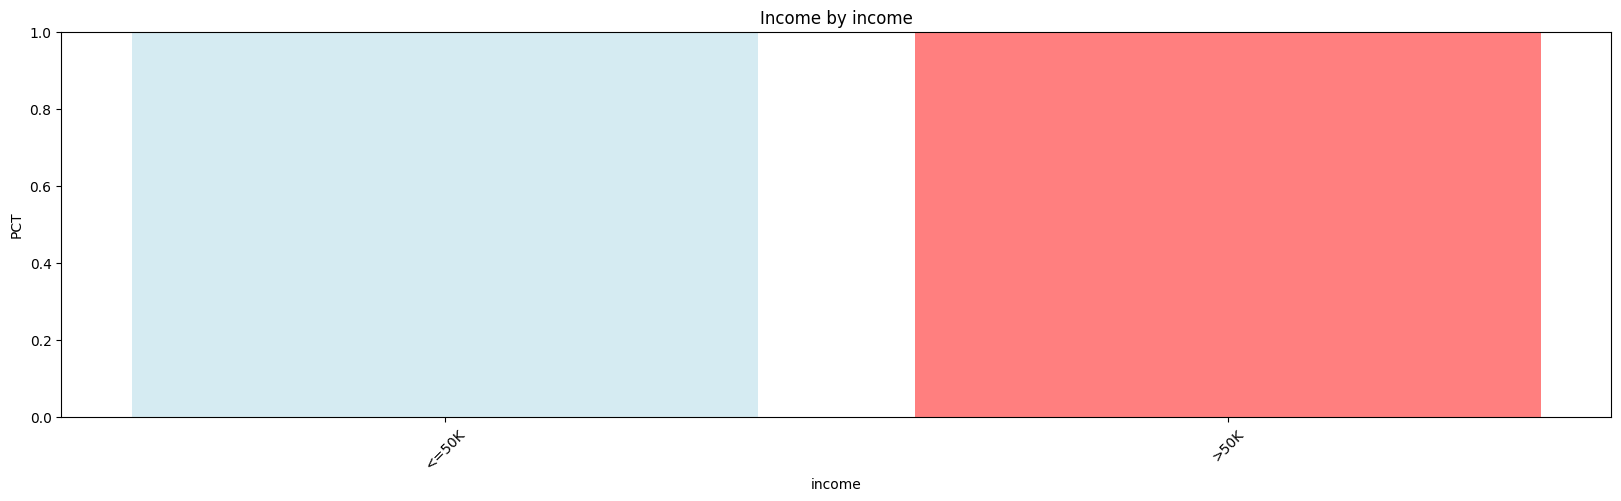

In [25]:
def bar_chars(col):
    # -- normalize index converts to row percetages, sort ascending=False means it will sort largest to smallest
    ctab = pd.crosstab(df[col], df['income'], normalize="index").reset_index().sort_values('<=50K',ascending=False )

    plt.figure(figsize=(20,5))
    # -- check out bottom
    plt.bar(ctab[col], ctab['<=50K'], facecolor='lightblue', alpha=0.5)
    plt.bar(ctab[col], ctab['>50K'], bottom=ctab['<=50K'], facecolor='red', alpha=0.5)
    plt.title('Income by ' + col)
    plt.ylabel('PCT')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.show()

for num_col in df.select_dtypes(include=['object']).columns:
    print(num_col)
    bar_chars(num_col)

## MultiVariate

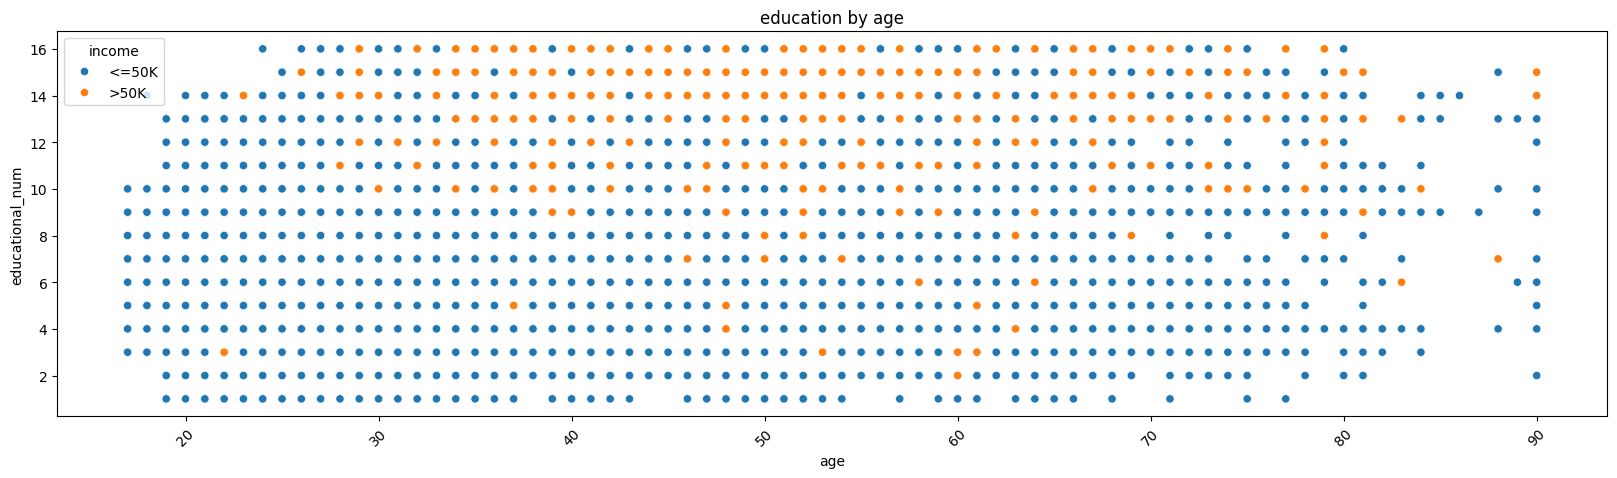

In [50]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=df, x="age", y="educational_num", hue='income')
plt.title('education by age')
# plt.ylabel('PCT')
plt.xticks(rotation=45)
#plt.xlabel(col)
plt.show()


In [ ]:
sns.pairplot(df, hue='income')

## Part 2.
### 5. Partition into 75/25 split
-----
Sklearn is our main pakage, we imported **train_test_split** from the model selection module. Why do we need to split the data? well we do it so that we are making predictions on an out-of-sample data, meaning will our prediction generalize to new and unseen data? it isn't fair to evaluate our prediction if it's seen the data before right? i mean you wouldn't go to your psychic and tell them exactly what you want to hear before they do your the reading?

So what percentage to use? the general rule of thumb is a 70/30 or 75/25 training test split. you'll "train" your model on 70% of the data and evaluate it on 30%.




In [26]:
train, test = train_test_split(df,test_size=0.30)
print("train pct: {:2.2%}".format(train.shape[0]/df.shape[0]))
print("test  pct: {:2.2%}".format(test.shape[0]/df.shape[0]))


train pct: 70.00%
test  pct: 30.00%


## 6. Write a rule to predict likely targets
-----
based on our exploratory analysis above we can see that age, education, and relationship are probalby good predictors of income. Here i'm going to create a rule based on the following logic

- age >= 40
- education in ('Bachelors', 'Masters', 'Doctorate', 'Prof-school')
- relationship in ('Husband', 'Wife')

To do this.
1. make a new column **income_pred** default it to <=50k, our majority class
2. write rules to update **income_pred** to equal >50k
3. I like confusion matricies they help you know how well you are doing, predicting the target.


In [27]:
# -- default the predicted target
train.loc[:,'income_pred'] = '<=50K'

# -- update where rules are met
train.loc[train['age'] >= 40, 'income_pred' ] = '>50K'
train.loc[train['education'].isin(['Bachelors', 'Masters', 'Doctorate', 'Prof-school']), 'income_pred' ] = '>50K'
train.loc[train['relationship'].isin(['Husband', 'Wife']),  'income_pred' ] = '>50K'

train.head()

,age,workclass,fnlwgt,education,educational_num,marital_status,occupation,relationship,gender,capital_gain,capital_loss,hours_per_week,native_country,income,income_pred
11016,33,Private,52240,Some-college,10,Never-married,Sales,Not-in-family,Female,0,0,40,United-States,<=50K,<=50K
17071,48,Private,102102,Assoc-voc,11,Married-civ-spouse,Tech-support,Husband,Male,0,0,50,United-States,>50K,>50K
12092,44,Private,213934,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,Male,2829,0,42,United-States,<=50K,>50K
19841,30,Self-emp-inc,117570,HS-grad,9,Divorced,Other-service,Not-in-family,Female,0,0,60,United-States,<=50K,<=50K
16405,19,Private,301606,Some-college,10,Never-married,Other-service,Own-child,Male,0,0,35,United-States,<=50K,<=50K


In [28]:

print("Training confusion Matrix")
confusion_matrix = pd.crosstab(train['income'], train['income_pred'],  rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_pct = pd.crosstab(train['income'], train['income_pred'], normalize="all", rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)


Training confusion Matrix
Predicted  <=50K   >50K
Actual                 
<=50K      10144  15846
>50K         208   7991


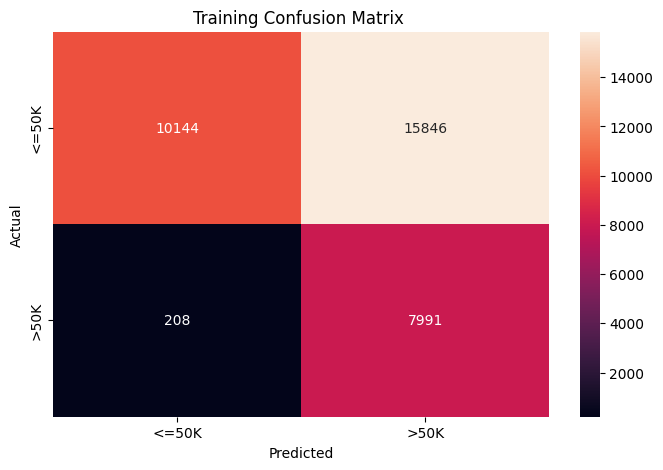

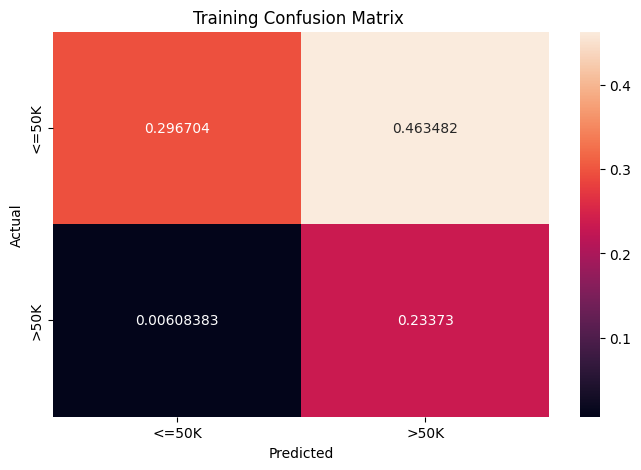

In [29]:

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.title('Training Confusion Matrix ')
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix_pct, annot=True, fmt='g')
plt.title('Training Confusion Matrix ')
plt.show()

Test confusion Matrix
Predicted  <=50K  >50K
Actual                
<=50K       4395  6770
>50K          72  3416


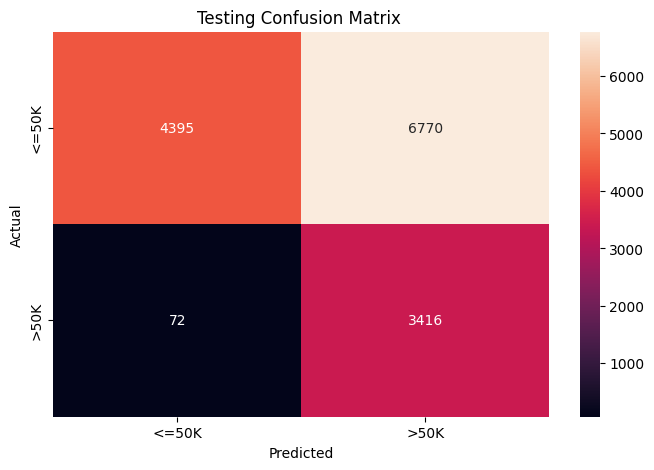

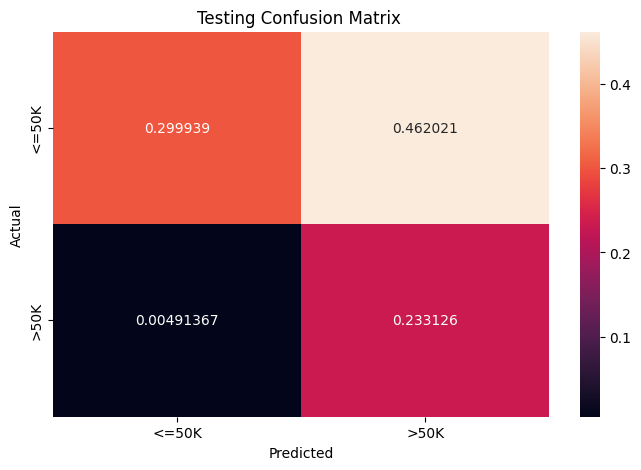

In [30]:
# -- repeat with the test dataset
test.loc[:,'income_pred'] = '<=50K'
# -- update where rules are met
test.loc[test['age'] >= 40, 'income_pred' ] = '>50K'
test.loc[test['education'].isin(['Bachelors', 'Masters', 'Doctorate', 'Prof-school']), 'income_pred' ] = '>50K'
test.loc[test['relationship'].isin(['Husband', 'Wife']),  'income_pred' ] = '>50K'

print("Test confusion Matrix")
confusion_matrix = pd.crosstab(test['income'], test['income_pred'],  rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_pct = pd.crosstab(test['income'], test['income_pred'], normalize="all", rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.title('Testing Confusion Matrix ')
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix_pct, annot=True, fmt='g')
plt.title('Testing Confusion Matrix ')
plt.show()

## 7. Evaluate

How accurate were we? Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right.
Formally, accuracy has the following definition:

    accuracy = number of correct predictions / all predictions
    
    
We always want to understand if we did nothing, how accurate were we? and then compare how accurate were we with our predictions.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html



In [31]:
from sklearn.metrics import accuracy_score
### Default Accuracy, i.e. do nothing predict everyone as <50K, is the same as saying what % of <50K
accuracy_default = train['income'].value_counts(normalize='True')[0]

accuracy_train = accuracy_score(train['income'], train['income_pred'])
accuracy_test = accuracy_score(test['income'], test['income_pred'])
print("Default Accuracy : {:2.2%}".format(accuracy_default))
print("Train Accuracy   : {:2.2%}".format(accuracy_train))
print("Test Accuracy    : {:2.2%}".format(accuracy_test))

Default Accuracy : 76.02%
Train Accuracy   : 53.04%
Test Accuracy    : 53.31%


# Hmm... is accuracy a good measure of evaluation?